# **Data Smoothing**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## Autocorrelation factor and Partial autocorrelation factors

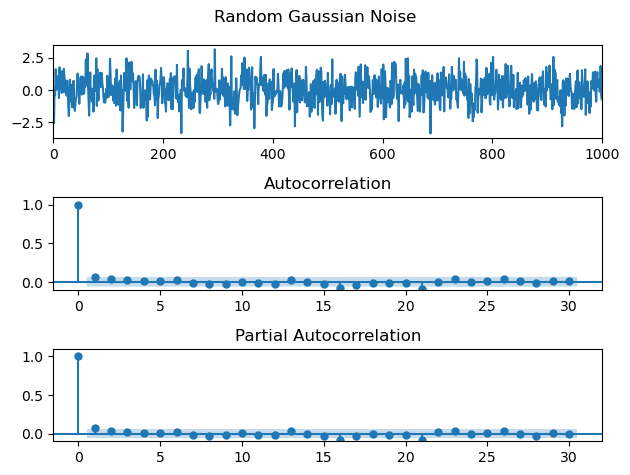

In [46]:
## Random Gaussian noise
t1 = range(1000)
x1 = np.random.normal(size=len(t1))
fig, ax = plt.subplots(3,1)
fig.suptitle('Random Gaussian Noise')
ax[0].plot(t1, x1)
ax[0].set(xlim=(0,1000))
plot_acf(x1, ax=ax[1])
ax[1].set(ylim=(-0.1,1.1))
plot_pacf(x1, ax=ax[2])
ax[2].set(ylim=(-0.1,1.1))
fig.tight_layout()

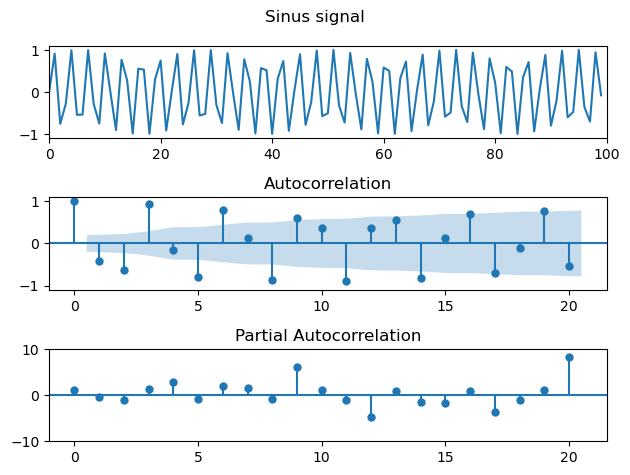

In [63]:
## Sinus signal
t2 = np.arange(100)
x2 = np.zeros(100)
x2[:] = np.sin(2*t2[:])
fig, ax = plt.subplots(3,1)
fig.suptitle('Sinus signal')
ax[0].plot(t2, x2)
ax[0].set(xlim=(0,100))
plot_acf(x2, ax=ax[1])
ax[1].set(ylim=(-1.1,1.1))
plot_pacf(x2, ax=ax[2])
ax[2].set(ylim=(-10,10))
fig.tight_layout()

## ARIMA model

    value
0  4.7185
1  4.7707
2  4.8828
3  4.8598
4  4.7958


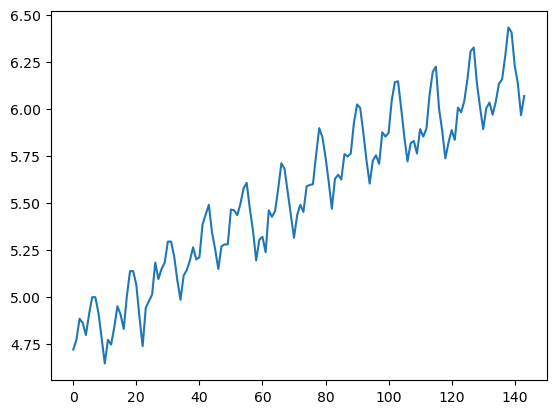

In [1]:
data = pd.read_csv('data.csv', names=['value'])
plt.plot(data)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

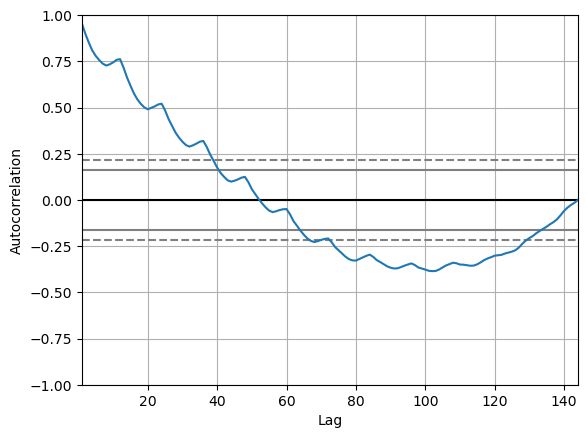

In [2]:
autocorrelation_plot(data.value)

c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


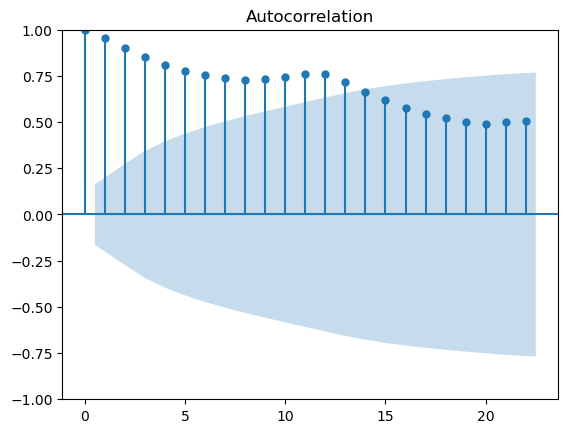

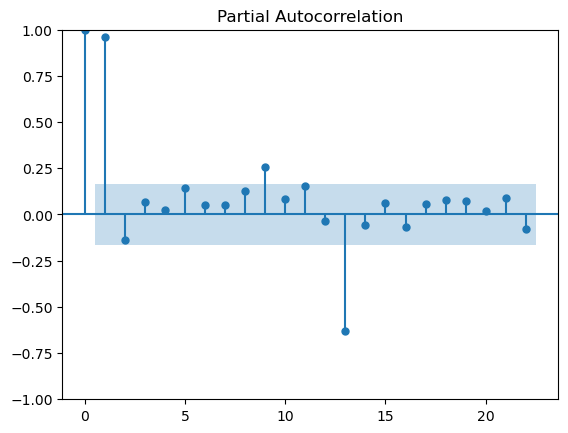

In [3]:
acf_original = plot_acf(data.value)

pacf_original = plot_pacf(data.value)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 130.044
Date:                Wed, 26 Apr 2023   AIC                           -248.087
Time:                        13:20:26   BIC                           -230.310
Sample:                             0   HQIC                          -240.863
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2126      0.103      2.063      0.039       0.011       0.414
ar.L2         -0.1931      0.104     -1.853      0.064      -0.397       0.011
ar.L3         -0.0125      0.082     -0.152      0.8

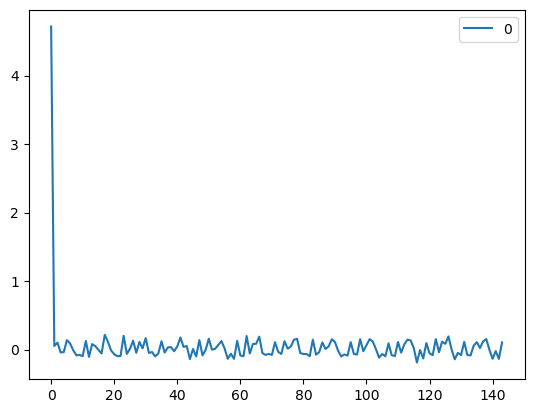

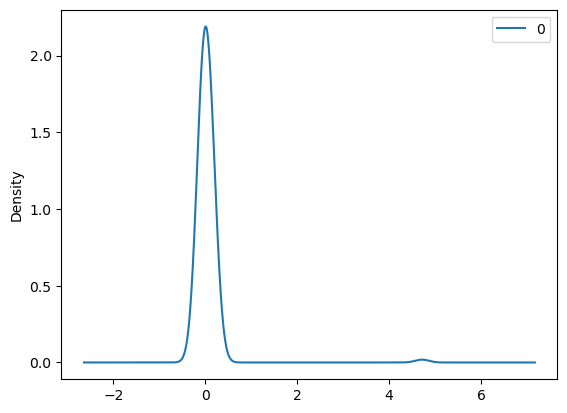

In [4]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data.value, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmo

Test RMSE: 0.032


c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


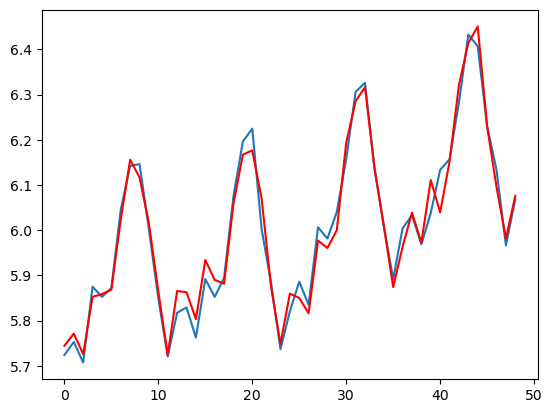

In [5]:
from sklearn.metrics import mean_squared_error
# split into train and test sets
X = data.value
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
test.reset_index(drop=True, inplace=True)
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(15,1,0), seasonal_order=(0,1,0, 12), )
 model_fit = model.fit(method='statespace')
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
#  print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')

In [6]:
import pmdarima as pm
auto_arima = pm.auto_arima(data, stepwise=True, seasonal=True)
auto_arima

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True)

c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmo

Test RMSE: 0.091


c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


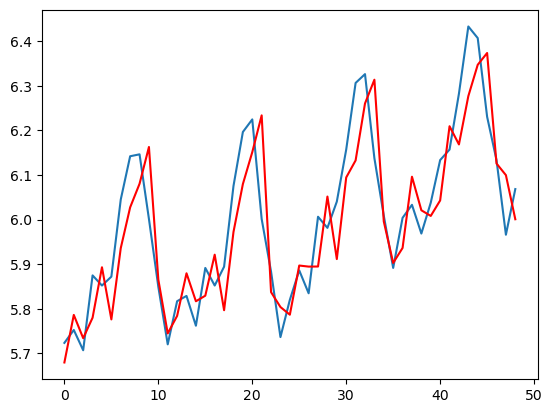

In [7]:
# split into train and test sets
X = data.value
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
test.reset_index(drop=True, inplace=True)
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(4,1,3))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
#  print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')

c:\Users\jlne\Miniconda3\envs\mark\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


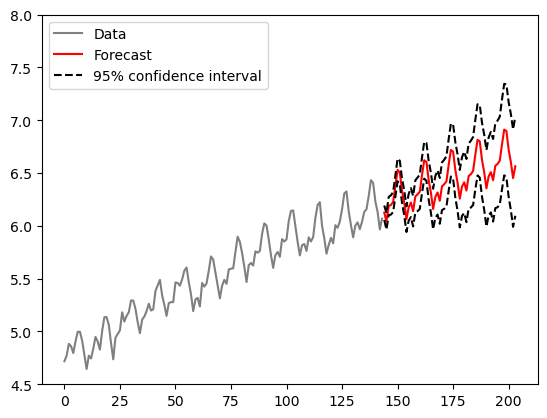

In [8]:
model = ARIMA(data.value, order=(15,1,0), seasonal_order=(0,1,2,12))
model_fit = model.fit()
output = model_fit.forecast(60)

forecast = model_fit.get_forecast(60)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

plt.plot(data, color='gray', label='Data')
plt.plot(yhat, 'r', label='Forecast')
plt.plot(yhat_conf_int['lower value'], '--k', label=r'95% confidence interval')
plt.plot(yhat_conf_int['upper value'], '--k')
plt.ylim(4.5,8)
plt.legend()

## Exponential Smoothing

In [19]:
def exp_smooth(X, alpha0):
    '''EXP_SMOOTH Exponential smoothing. 
        Author: Kamil Wojcicki, UTD, January 2012.
        Reference:
        [1] Greg Stanley, 2011, "Exponential filtering", 
        url: http://tinyurl.com/exponential-filtering'''
    # Smoothing constant
    alpha = alpha0
    # Number of column vector signals (M) and their lengths (N)
    N, M = X.shape
    # for each column vector signal
    S = np.zeros(shape=(N,M))
    for m in range(M):
        # for each sample
        S[0, m] = X[0, m]
        for n in range(1,N):
            # apply the exponential smoother [1]
            S[n, m] = alpha * X[n, m] + (1-alpha)*S[n-1, m]
            # S[n, m] = alpha * S[n-1, m] + (1-alpha)*X[n, m]
            # X(n,m) = alpha*X(n-1,m) + (1-alpha)*X(n,m);     NOT THE SAME EQUATION CHECK WITH PEDRAM
    return S
    

(800, 2)


[Text(0, 0.5, 'Amplitude'),
 Text(0.5, 0, 'Time [s]'),
 Text(0.5, 1.0, 'Smooth signal')]

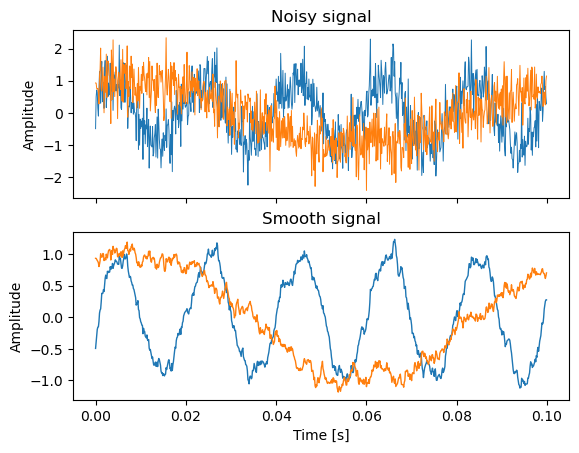

In [25]:
## Case Example:
np.random.seed = 2
#  define alph (between 0 and 1)
alpha=0.1

#  define signal duration (s)
duration = 0.1

#  define sampling frequency (Hz)
fs = 8E3

#  get signal length (samples)
N = round(fs*duration)

#  generate signal time vector (s)
time = np.arange(start=0,stop=duration, step=1/fs)

#  generate input signals (sinusoids in noise)
X = np.zeros(shape=(N,2))
X[:,0] = [0.5*np.random.normal() + np.sin(2*np.pi*50*time[i]+np.pi/9) for i in range(N)]
X[:,1] = [0.5*np.random.normal() + np.sin(2*np.pi*10*time[i]+np.pi/3) for i in range(N)]


print(X.shape)
#  apply exponential smoothing 
Y = exp_smooth(X, alpha)
# Y = expsmooth(X, alpha)

# ## Plotting
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(time,X, linewidth=.7)
ax[0].set(ylabel='Amplitude', title='Noisy signal')
ax[1].plot(time,Y, linewidth=1)
ax[1].set(ylabel='Amplitude', xlabel='Time [s]', title='Smooth signal')